# Getting Data

This notebook will walk through the process of using Python for identifying/scraping data, performing exploratory data analysis, and gaining insight from the data. 

Data can be found anywhere online. If you're lucky there's an API that makes it easy to request data from a database, but sometimes it'll take a bit more elbow grease. If data is shown on a website you could read the HTML into Python, and parse through it to find the relevant data you want (libraries such as "Beautiful Soup" would help with this). The data you find does not initially need to be perfectly formatted for you to be able to perform data analysis on it.

In this notebook I am going to look at how greenhouse gas emissions have changed over time from 1990-2014, and global temperatures over that same span. I initially found the greenhouse gas data on the United Nations' website, but each variable (carbon dioxide, methane, etc) was stored in a different dataset. I was able to find the same data on Kaggle, a website where you can find many datasets and other data science resources, which allowed me to download everyting I wanted directly as a CSV file.

UN website link:
http://data.un.org/Explorer.aspx

Kaggle link:
https://www.kaggle.com/unitednations/international-greenhouse-gas-emissions

With that CSV file I can easily read it into Python using a library called Pandas, which helpes with storing the data and memory as a "dataframe" and provides many functions that help with manipulating the data.

In [59]:
import pandas as pd

In [71]:
# imports the csv into a pandas dataframe object
ghg_data = pd.read_csv("greenhouse_gas_inventory_data.csv")

# shows the first 5 rows
ghg_data.head()

,country_or_area,year,value,category
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...


I found the global temperature data on NASA's website as a .txt file; it has the recorded "temperature anomaly" for each year from 1880 to 2020, where "temperature anomaly" is the temperature in Celsius *relative* to the average temperature from 1951-1980. It contains the exact values as well as "smoothed" values, but I will only deal with the exact data here.

Link to data:
https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt

Description of data:
https://climate.nasa.gov/vital-signs/global-temperature/

In [66]:
import requests as req

In [94]:
# gets the text file from nasa.gov
web = req.get("https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt")

# first 500 characters
web.text[:500]

# this is going to need a bit of cleaning up...

'Land-Ocean Temperature Index (C)\n--------------------------------\n\nYear No_Smoothing  Lowess(5)\n----------------------------\n1880     -0.16     -0.08\n1881     -0.08     -0.12\n1882     -0.10     -0.16\n1883     -0.16     -0.20\n1884     -0.28     -0.23\n1885     -0.33     -0.26\n1886     -0.31     -0.27\n1887     -0.36     -0.27\n1888     -0.17     -0.26\n1889     -0.10     -0.25\n1890     -0.35     -0.25\n1891     -0.22     -0.25\n1892     -0.27     -0.26\n1893     -0.31     -0.26\n1894     -0.30     -0.24\n'

In [96]:
txt = web.text.split("\n")[5:]
txt

['1880     -0.16     -0.08',
 '1881     -0.08     -0.12',
 '1882     -0.10     -0.16',
 '1883     -0.16     -0.20',
 '1884     -0.28     -0.23',
 '1885     -0.33     -0.26',
 '1886     -0.31     -0.27',
 '1887     -0.36     -0.27',
 '1888     -0.17     -0.26',
 '1889     -0.10     -0.25',
 '1890     -0.35     -0.25',
 '1891     -0.22     -0.25',
 '1892     -0.27     -0.26',
 '1893     -0.31     -0.26',
 '1894     -0.30     -0.24',
 '1895     -0.23     -0.22',
 '1896     -0.11     -0.20',
 '1897     -0.11     -0.18',
 '1898     -0.27     -0.16',
 '1899     -0.17     -0.17',
 '1900     -0.08     -0.20',
 '1901     -0.15     -0.23',
 '1902     -0.27     -0.25',
 '1903     -0.37     -0.28',
 '1904     -0.47     -0.31',
 '1905     -0.26     -0.33',
 '1906     -0.22     -0.36',
 '1907     -0.38     -0.37',
 '1908     -0.43     -0.39',
 '1909     -0.48     -0.41',
 '1910     -0.43     -0.41',
 '1911     -0.44     -0.39',
 '1912     -0.36     -0.35',
 '1913     -0.34     -0.32',
 '1914     -0.

# Exploring the Data

In [60]:
import matplotlib.pyplot as plt

In [73]:
for s in ghg_data.category.drop_duplicates().values:
    print(s + "\n")

carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent

greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent

greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent

hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent

methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent

nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent

nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent

perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent

sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent

unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent



In [72]:
df = ghg_data.pivot_table(index="year", columns=["category"])
df.columns = df.columns.droplevel()
df.columns = ["CO2", "GHGs_1", "GHGs_2", "HFCs", "CH4", "NF3", "N2O", "PFCs", "SF6", "HFCs_PFCs_mix"]
df.head()

,CO2,GHGs_1,GHGs_2,HFCs,CH4,NF3,N2O,PFCs,SF6,HFCs_PFCs_mix
year,,,,,,,,,,
1990,455379.936166,633243.305620,587003.637294,6616.886179,87094.095299,18.383797,36194.407289,3838.874861,2074.533801,3901.551150
1991,446193.986253,618145.225307,573555.753951,6159.500972,84511.860775,18.871227,34748.195912,3523.418645,2055.211806,3680.115869
1992,431901.700232,597397.641955,554945.603744,5290.472902,81528.146297,19.408413,33609.735740,3198.749121,2059.102498,3672.904628
1993,426304.676894,588482.640738,546260.074250,4992.882331,79167.104710,23.278081,32976.558788,3174.231901,2075.474610,3672.738024
1994,421997.498173,580717.203385,539429.916433,5127.461987,77076.932886,25.988809,32253.689517,2977.335790,2029.666582,3855.997597


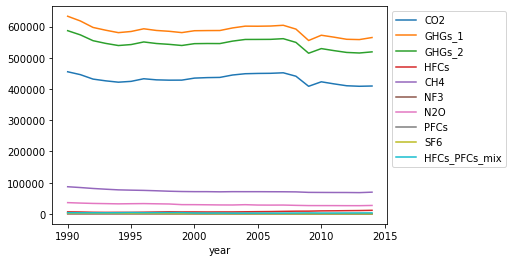

In [34]:
df.plot()
plt.legend(bbox_to_anchor=(1,1), loc="upper left");

<AxesSubplot:xlabel='year'>

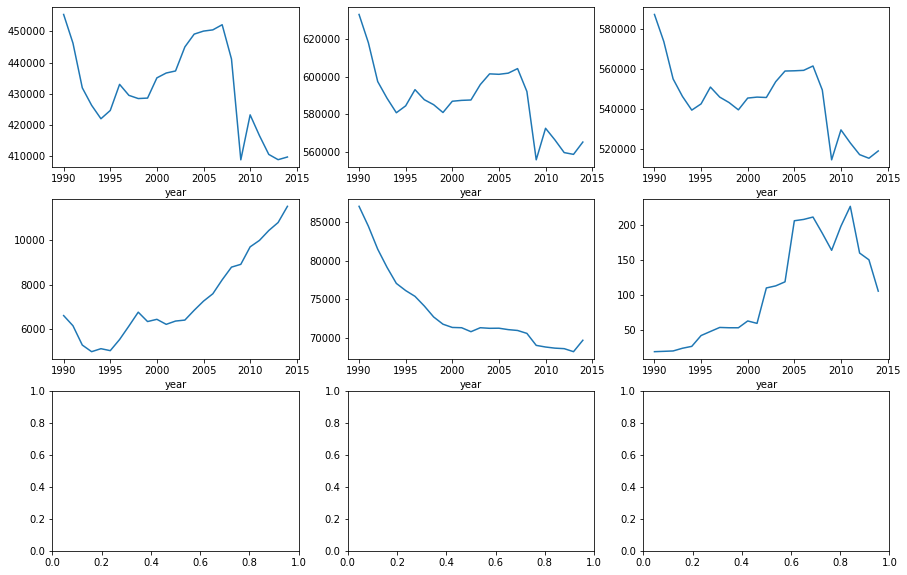

In [55]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
df["CO2"].plot(ax=ax[0][0])
df["GHGs_1"].plot(ax=ax[0][1])
df["GHGs_2"].plot(ax=ax[0][2])
df["HFCs"].plot(ax=ax[1][0])
df["CH4"].plot(ax=ax[1][1])
df["NF3"].plot(ax=ax[1][2])

In [56]:
df_sum = df.sum(axis=1)
df_sum

year
1990    1.815366e+06
1991    1.772592e+06
1992    1.713623e+06
1993    1.687130e+06
1994    1.665492e+06
1995    1.674836e+06
1996    1.699746e+06
1997    1.684301e+06
1998    1.676323e+06
1999    1.664722e+06
2000    1.681053e+06
2001    1.682121e+06
2002    1.682166e+06
2003    1.705650e+06
2004    1.722046e+06
2005    1.722226e+06
2006    1.723244e+06
2007    1.730025e+06
2008    1.694070e+06
2009    1.588392e+06
2010    1.634744e+06
2011    1.615662e+06
2012    1.597272e+06
2013    1.592882e+06
2014    1.606805e+06
dtype: float64

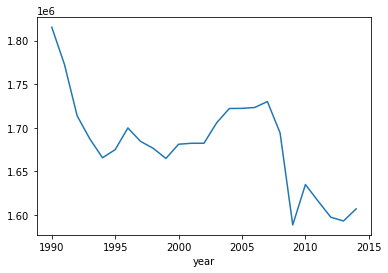

In [58]:
df_sum.plot();

# Extra

In [6]:
data = raw_data.groupby(["category", "year"]).mean()
data

value
category                                           year               
carbon_dioxide_co2_emissions_without_land_use_l... 1990  455379.936166
                                                   1991  446193.986253
                                                   1992  431901.700232
                                                   1993  426304.676894
                                                   1994  421997.498173
...                                                                ...
unspecified_mix_of_hydrofluorocarbons_hfcs_and_... 2010    2831.560342
                                                   2011    2843.941788
                                                   2012    2982.863196
                                                   2013    3126.871854
                                                   2014    3251.263226

[250 rows x 1 columns]

In [7]:
data.index.names

FrozenList(['category', 'year'])

<AxesSubplot:xlabel='year'>

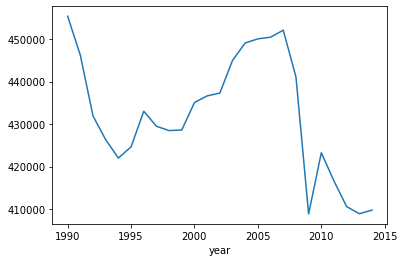

In [8]:
s = "carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent"
data.loc[s, "value"].plot()